# Diabetes🍬
---

## About dataset 📄

This dataset show us certain variables that determine if a female patient has a diabetes or no. And my task is analyze each one of them and find certan insights that allow me to know how to recognize when a patient has it. 

Despite the fact that I don't know how to create a ML algorithm yet, anyway I'll create a program that can predict a diagnostic.

---

## Variables in dataset
1. Pregnancies: How many times?
2. Clucose: Levels of glucose
3. Blood pressure
4. Skin thickness
5. Insulin: Levels of insulin
6. BMI: Body mass index
7. Dianetes pedigree function: Likelihood of having diabetes based on family history
8. Age
9. Outcome => 1: Yes | 0: No
---

## Analysis:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Extract the dataset
df_diabetes = pd.read_csv('/work/Diabetes_dataset/diabetes.csv', header=0, sep=',')

In [3]:
#Change the index
idx = ['patient_{}'.format(_) for _ in range(1, df_diabetes.shape[0]+1)]
df_diabetes.index = idx
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
patient_1,6,148,72,35,0,33.6,0.627,50,1
patient_2,1,85,66,29,0,26.6,0.351,31,0
patient_3,8,183,64,0,0,23.3,0.672,32,1
patient_4,1,89,66,23,94,28.1,0.167,21,0
patient_5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
class display(object):
  """Display HTML representation of multiple objects"""
  template = """<div style="float: left; padding: 10px;">
  <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
  </div>"""
  def __init__(self, *args):
      self.args = args
        
  def _repr_html_(self):
      return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
  def __repr__(self):
      return '\n\n'.join(a + '\n' + repr(eval(a))
                          for a in self.args)

### Pregnancies 🤰

In [5]:
patient_yes = df_diabetes.loc[df_diabetes.Outcome == 1, ['Pregnancies', 'Outcome']]    
patient_no = df_diabetes.loc[df_diabetes.Outcome == 0, ['Pregnancies', 'Outcome']]

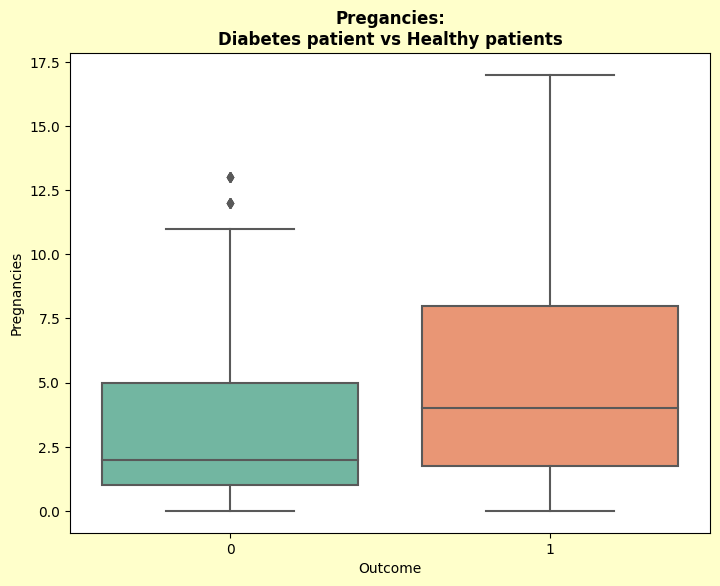

In [6]:
#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
ax = sns.boxplot(data=df_diabetes, x='Outcome', y='Pregnancies', palette='Set2')
ax.set_title('Pregancies:\nDiabetes patient vs Healthy patients', 
fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In [7]:
stats_1 = patient_yes.describe().iloc[1:]
stats_0 = patient_no.describe().iloc[1:]
display('stats_1', 'stats_0')

,Pregnancies,Outcome
mean,4.865672,1.0
std,3.741239,0.0
min,0.000000,1.0
25%,1.750000,1.0
50%,4.000000,1.0
75%,8.000000,1.0
max,17.000000,1.0
,Pregnancies,Outcome
mean,3.298000,0.0
std,3.017185,0.0


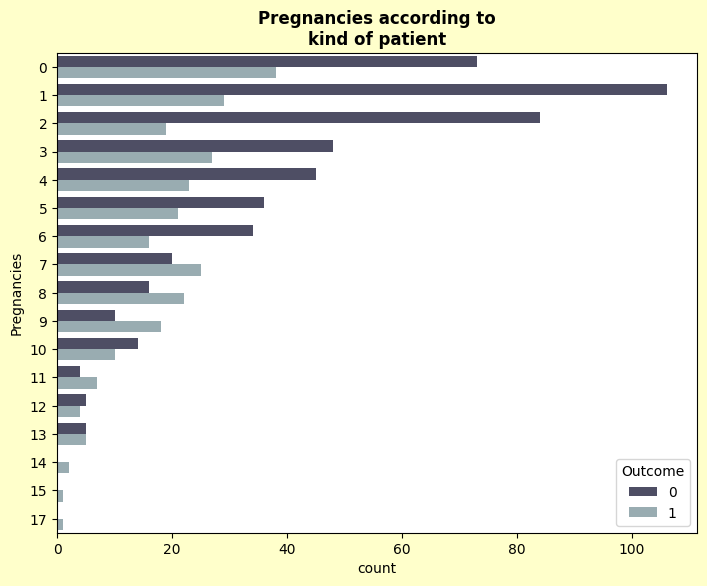

In [8]:
#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Countplot
ax = sns.countplot(data=df_diabetes, y='Pregnancies', hue='Outcome', orient='h', palette='bone')
ax.set_title('Pregnancies according to\nkind of patient', 
fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

75% of diabetes patient have had 8 >= pregnancies; instead, healthy patients have had 5 >= pregnancies. That means the first ones are also the ones with the most number of pregancies.

But, I consider it's not a important factor when you determine if a patient has or no diabetes, since it can be observed the difference between sick and healthy patients who had between 12 and 13 pregancies is little significative. 



---

### Glucose or blood sugar 🩸

It's key to keeping your body in top working order.
Let's discover in what amount is dangerous for our health.

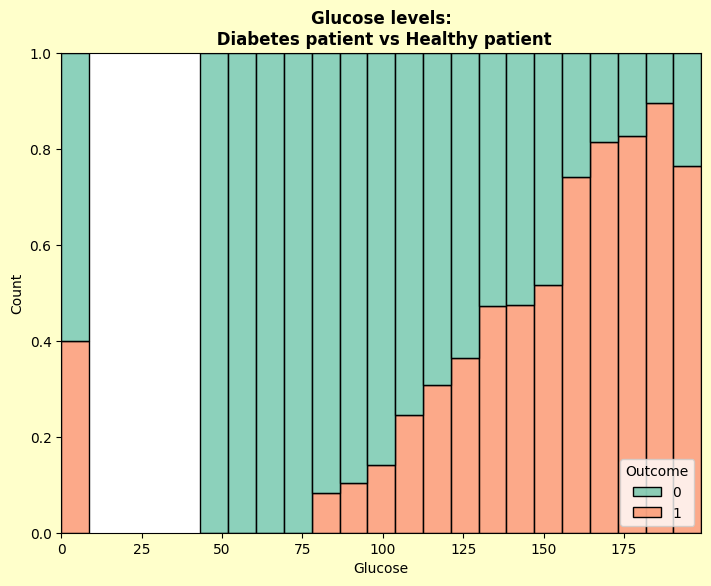

In [9]:
#Canvas
fig = plt.figure()
#Diabetes_1
ax = fig.add_axes([0, 0, 1, 1])
ax = sns.histplot(data=df_diabetes, x='Glucose', hue='Outcome', multiple='fill', palette='Set2')
ax.set_title('Glucose levels:\n Diabetes patient vs Healthy patient', 
fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In the same way as with the pregnancies, it can be seen exist situations where both kind of patients have the same level of glucose, but you don't necessarily have the disease. However, what it's clear is that from level of glucose greater than 150 the probability of having diabetes begin to increase.

---

Applying Bayes' Theorem in otder to determine the probability of previously mentioned:
$$
P(diabetes=1 | glucose > 150) = \frac{P(glucose > 150 | diabetes=1)P(diabetes=1)}{P(glucose > 150)}
$$

In [10]:
# P(glucose > 150 | diabetes=1)
cond_1 = df_diabetes.Glucose > 150
cond_2 = df_diabetes.Outcome == 1
both_cond = df_diabetes[cond_1 & cond_2].shape[0]
diabetes_1 = df_diabetes[cond_2].shape[0]
cond_probability = both_cond / diabetes_1
# P(diabetes = 1)
diabetes_prob = diabetes_1 / df_diabetes.shape[0]
# P (glucose > 150)
glucose_prob = df_diabetes[cond_1].shape[0] / df_diabetes.shape[0]

In [11]:
# Bayes' theorem
probability = (cond_probability * diabetes_prob) / glucose_prob
print('P(diabetes = 1 | glucose > 150) = {} or %{}'.
format(probability, probability*100))

P(diabetes = 1 | glucose > 150) = 0.75 or %75.0


High risk:
It exists a 75% of probability of having diabetes if your levels of glucose are greater than 150

---

### Blood pressure 
It's the measure of the force that your hearth uses to pump blood around your body.

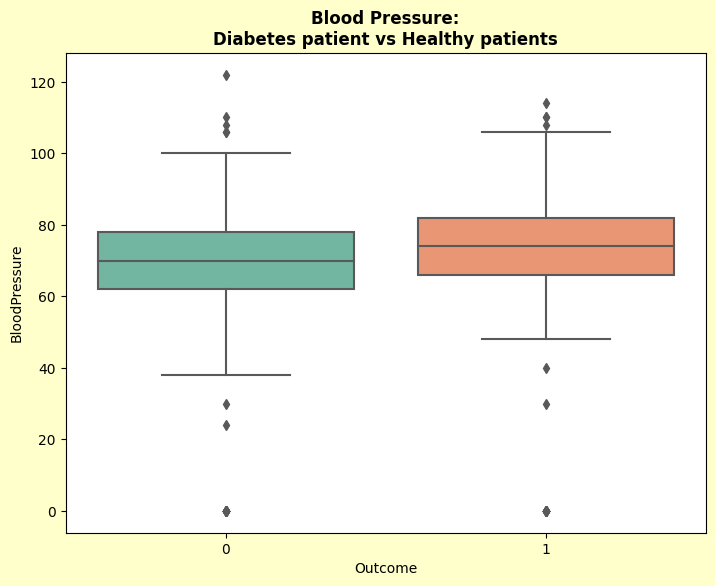

In [12]:
#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Histogram
ax = sns.boxplot(data=df_diabetes, x='Outcome', y='BloodPressure', palette='Set2')
ax.set_title('Blood Pressure:\nDiabetes patient vs Healthy patients', 
fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In [13]:
#Blood pressure in diabet pacients
bp_1 = df_diabetes.loc[df_diabetes.Outcome == 1, ['BloodPressure']].describe().iloc[1:]
#Blood pressure in healthy pacients
bp_0 = df_diabetes.loc[df_diabetes.Outcome == 0, ['BloodPressure']].describe().iloc[1:]

display('bp_1', 'bp_0')

,BloodPressure
mean,70.824627
std,21.491812
min,0.000000
25%,66.000000
50%,74.000000
75%,82.000000
max,114.000000
,BloodPressure
mean,68.184000
std,18.063075


**DATA:** If the blood pressure is 120 mm Hg == High and dangerous for our health.

* Blood pressure of 75% diabetes patients: 82 mm Hg
* Blood pressure of 75% healthy patients: 78 mm Hg

It's true diabetes patients are also the one with the greatest blood pressure have. However, any of them has reached or exceed 120 mm Hg (High blood pressure)

On the other hand, the greatest registered blood pressure was in a healthy patient: 122 mm Hg, So it would be wrong to say that if a patient have a high blood pressure, then also has diabetes.

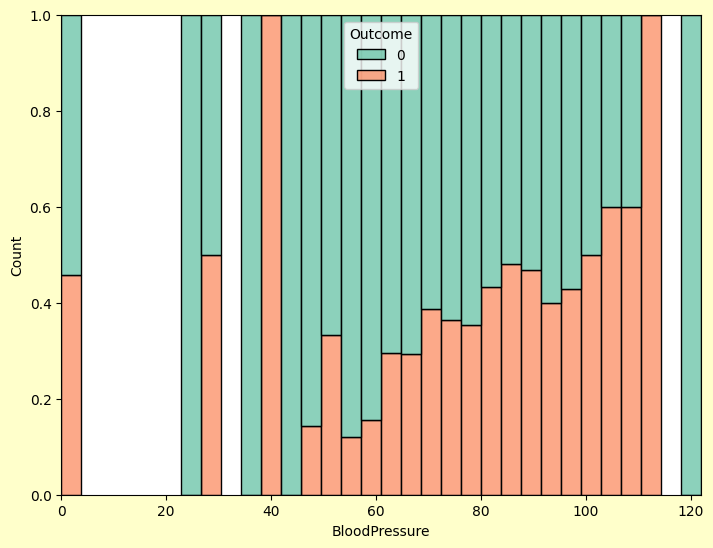

In [14]:
#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Histogram
ax = sns.histplot(data=df_diabetes, x='BloodPressure', hue='Outcome', multiple='fill',
palette='Set2')

fig.set_facecolor('#FFFFCB')
fig.show()

You can see that from 100 mm Hg the number of diabetes patient begins to increase. But, how likely  is a patient has diabetes, since its blood pressure is >= 100?

---

$$
P(\text{diabetes=1}|\text{bp >= 100}) = \frac{P(\text{diabetes = 1})*P(\text{bp>=100 | diabetes=1})}{P(\text{bp >= 100})}
$$


In [15]:
#Prior: P(diabates=1)
diabetes_1 = df_diabetes[cond_2].shape[0]
prior = diabetes_1 / df_diabetes.shape[0]
#Likelihood: P(bp >= 100 | diabetes = 1)
cond_1 = df_diabetes.BloodPressure >= 100
cond_2 = df_diabetes.Outcome == 1
both_cond = df_diabetes[cond_1 & cond_2].shape[0]
likelihood = both_cond / diabetes_1
#Evidence: P(bp >= 100)
bp_100 = df_diabetes[cond_1].shape[0]
evidence = bp_100 / df_diabetes.shape[0]

In [16]:
#Bayes' Theorem
p = (likelihood * prior) / evidence
print('Probability: {}%'.
format(p*100))

Probability: 56.25%


The obtained likelihood is not enough to affirm that if a patient has a blood pressure >= 100, then also has diabetes. So it's not a determinant factor. 

---

### Skin Thickness
A diabetes patient have to inyect itself insulina due to its body doesn't produce this hormone. And this causes that the skin becomes more thick.

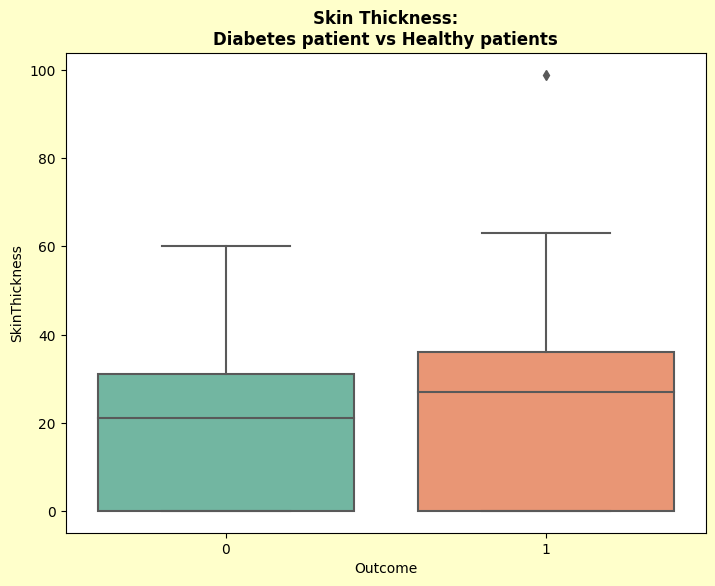

In [17]:
#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Boxplot
ax = sns.boxplot(data=df_diabetes, x='Outcome', y='SkinThickness', palette='Set2')
ax.set_title('Skin Thickness:\nDiabetes patient vs Healthy patients',
fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In [18]:
#Diabetes patient
skin_1 = df_diabetes.loc[df_diabetes.Outcome == 1, ['SkinThickness']].describe().iloc[1:]

#Healthy patient
skin_0 = df_diabetes.loc[df_diabetes.Outcome == 0, ['SkinThickness']].describe().iloc[1:]

display('skin_1', 'skin_0')

,SkinThickness
mean,22.164179
std,17.679711
min,0.000000
25%,0.000000
50%,27.000000
75%,36.000000
max,99.000000
,SkinThickness
mean,19.664000
std,14.889947


* 75% diabetes patient has a skin thickness equals to 36 >=
* 75% healthy patient has a skin thickness equals to 31 >=

It turns out diabetes patient are the ones with the greatest skin thickness. Nevertheless, that doesn't mean that your skin thickness determine if you have diabetes, since there are cases where both sorts of patients has the same skin thickness.

---

### Insulin

It's a hormone created by your pancreas that controls the amount of glucose in your bloodstream at anny given moment.

---
As mentioned above, diabetes patients have the highest levels of glucose. However, that doesn't mean that by having a high glucose, you have the disease, but what is true is that the probability increases.

On the other hand,the insuline levels of a diabetes patient are low, since the pancreas stop producing it or simply doesn't produce enough. Therefore, it's expected that when this variable is relationed with glucose, the behaviour of the data will be as follows: ⬆ glucosa, ⬇ insulina.

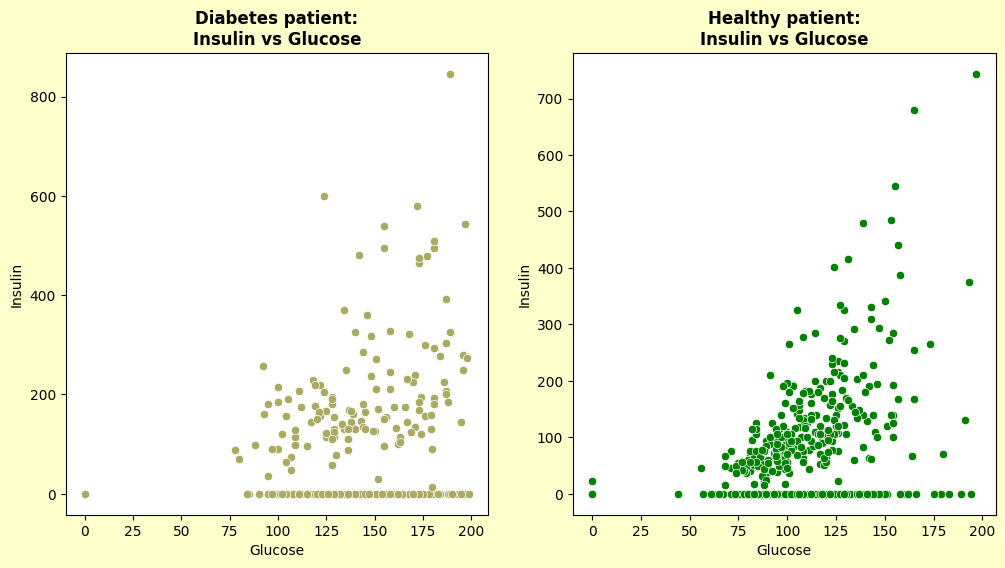

In [19]:
diabetes_1 = df_diabetes[df_diabetes.Outcome == 1] #Diabetes patient
diabetes_0 = df_diabetes[df_diabetes.Outcome == 0] #Healthy patient

#Canvas
fig = plt.figure(figsize=(12, 6))
#Scatter plot: Diabetes Patient
ax1 = fig.add_subplot(121)
ax1 = sns.scatterplot(data=diabetes_1, x='Glucose', y='Insulin', color='#AAAA62')
ax1.set_title('Diabetes patient:\nInsulin vs Glucose', fontdict={'size': 'large', 'weight': 'bold'})
#Scatter plot: Healthy Patient
ax2 = fig.add_subplot(122)
ax2 = sns.scatterplot(data=diabetes_0, x='Glucose', y='Insulin', color='#008000')
ax2.set_title('Healthy patient:\nInsulin vs Glucose', fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

Correlation coefficient
$$
p = \frac{cov(x, y)}{std(x)std(y)}
$$

In [20]:
insulin = df_diabetes.loc[:, 'Insulin']
glucose = df_diabetes.loc[:, 'Glucose']
#Correlation coefficient's elements
cov = np.cov(insulin, glucose)[0, 1]
std_insulin = insulin.std()
std_glucose = glucose.std()

p = cov / (std_insulin * std_glucose)
p

0.3313571099202091

In the scatter plot, the following was obtained:
* There are diabetes patients who have very high levels of glucose as well as insulin. And this is incongruous by the relationship mentioned above: ⬆ glucosa, ⬇ insulina. 
* There are healthy patients with very high levels of insuline and glucose. Perhaps, will there  be false negatives?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c1c952b-183d-448e-960f-fbcdcffa7de5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>